In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")



In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict


In [7]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


In [6]:
# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


C:\Users\yotam\AppData\Roaming\Python\Python39\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach


In [7]:

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

woman sitting on the beach with her dog and a cell phone


In [3]:
df = pd.read_csv(r'C:\Users\yotam\Desktop\naya\df_clean_after_pca')
df = df[df['rating']!=0]
df_isbn = df['isbn']
num_dict = {}
for i,j in enumerate(df_isbn.unique()):
    num_dict[j]=i
df['isbn_num'] = df['isbn'].apply(lambda txt: num_dict[txt])
df = df.reset_index(drop = True)

In [11]:
list(df.columns)

['Unnamed: 0',
 'index',
 'user_id',
 'location',
 'age',
 'isbn',
 'rating',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'img_s',
 'img_m',
 'img_l',
 'Summary',
 'Language',
 'Category',
 'city',
 'state',
 'country',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',


In [4]:
df_category = pd.DataFrame(df['img_l'].unique())

In [5]:
df_category = df_category.rename(columns={0:"img_l"})

In [8]:
df_category.iloc[1]['img_l']

'http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg'

In [6]:
df_category['cover_page'] = '9'

In [21]:
df_category

,img_l,cover_page
0,http://images.amazon.com/images/P/0002005018.0...,a close up of a book cover with two women
1,http://images.amazon.com/images/P/0374157065.0...,9
2,http://images.amazon.com/images/P/0399135782.0...,9
3,http://images.amazon.com/images/P/0771074670.0...,9
4,http://images.amazon.com/images/P/1558746218.0...,9
...,...,...
30913,http://images.amazon.com/images/P/0590449834.0...,9
30914,http://images.amazon.com/images/P/1573229067.0...,9
30915,http://images.amazon.com/images/P/0553269577.0...,9
30916,http://images.amazon.com/images/P/0451518144.0...,9


In [13]:
img_url = df_category.loc[0,'img_l']
                

In [11]:
url

'http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg'

In [16]:
#img_url = df_category.iloc[8]['img_l']
#raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')



# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

C:\Users\yotam\AppData\Roaming\Python\Python39\site-packages\transformers\generation\utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a close up of a book cover with two women


In [23]:
11%10

1

In [20]:
df_category.loc[0,'cover_page']=processor.decode(out[0], skip_special_tokens=True)

In [ ]:
from PIL import Image
import requests
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
for i in range(len(df_category)):
    img_url = df_category.iloc[i]['img_l']

    try:
        response = requests.get(img_url, headers=headers, stream=True)

        response.raise_for_status()  # Check if the request was successful

        # Open the image from the response content (bytes) and convert to RGB mode
        raw_image = Image.open(response.raw).convert('RGB')

        # You can perform further processing with the `raw_image` object here

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the image from the URL: {e}")
        continue

    except Image.UnidentifiedImageError:
        print("Unable to identify the image file. Please check the URL or image format.")
        continue
    try:
        inputs = processor(raw_image, return_tensors="pt")
        out = model.generate(**inputs)
    except:
        continue
    df_category.loc[i,'cover_page']=processor.decode(out[0], skip_special_tokens=True)
    if i%200==0:
        print("reach",i)
        df_category.to_csv('cover_page.csv')

reach 0
reach 200
Error fetching the image from the URL: 404 Client Error: Not Found for url: http://images.amazon.com/images/P/0440419468.01.LZZZZZZZ.jpg
Error fetching the image from the URL: 404 Client Error: Not Found for url: http://images.amazon.com/images/P/1551667959.01.LZZZZZZZ.jpg
reach 600
reach 800
reach 1000
reach 1200
reach 1400
reach 1600
reach 1800
reach 2000
reach 2200
reach 2600
reach 2800
reach 3000
reach 3200
reach 3400
reach 3600
reach 3800
reach 4000
reach 4200
reach 4400
reach 4600
reach 4800
reach 5000
reach 5200
reach 5400
reach 5600
reach 5800
reach 6200
reach 6400
reach 6600
reach 6800
reach 7000
reach 7200
reach 7400
reach 7600
reach 7800
reach 8000
reach 8200
reach 8400
reach 8600


### reach 8600

In [29]:
img_url

'http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg'

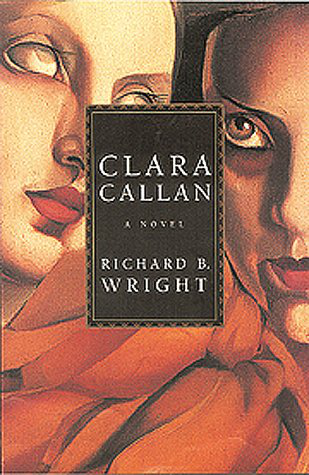

In [15]:
raw_image